<a href="https://colab.research.google.com/github/nobrelu/PythonExercises/blob/main/desafiofinal_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Final IGTI - Bootcamp Pessoa Programadora Iniciante

Atividades:

O aluno deverá desenvolver um sistema para controle de folha de pagamento de 
funcionários de uma empresa. O programa deverá fornecer um menu de interação pelo terminal ao usuário, com as seguintes opções:

*   Cadastrar funcionário
*    Imprimir contracheque

Na opção 1, o programa deverá pedir ao usuário que digite o nome e o salário bruto do funcionário. Esse funcionário deve ser armazenado em uma lista. O local de armazenamento fica a critério do aluno, podendo ser em memória ou em arquivo por exemplo.

Na opção 2 o programa deverá perguntar ao usuário qual o índice do funcionário que ele deseja imprimir o contracheque. Lembrando que nas listas o primeiro registro corresponde ao índice 0. 

Após o usuário digitar o índice, o programa deverá realizar os cálculos abaixo para informar ao funcionário os descontos que ele terá no seu salário. Para simplificar, o programa deverá calcular somente o desconto do INSS e do IRRF, sem considerar variáveis adicionais, como por exemplo número de dependentes.

Primeiro é feito o cálculo do desconto INSS. Ele é feito de forma progressiva de acordo a faixa salarial, considerando a tabela abaixo:

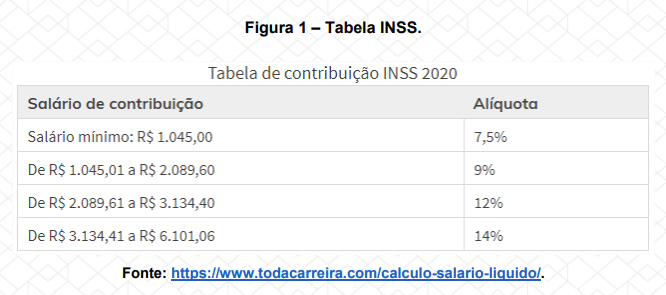


Tabela IRRF:

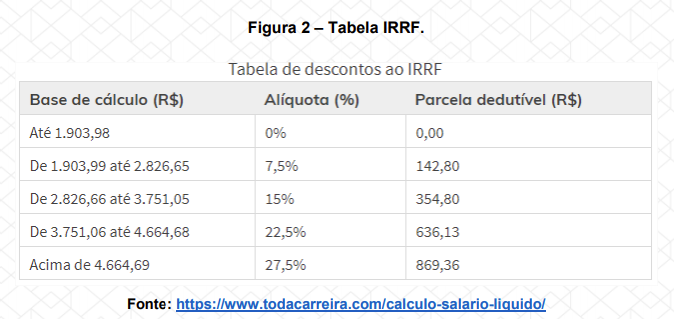


In [1]:
#BUSCANDO POR PARTE DO NOME
# é necessário refatorar
# fazer testes negativos

lista_funcionarios=[]

def cadastrar_funcionario():
  resposta = "S"
  while resposta == "S":
    print('Cadastro de Funcionário')
    funcionario=[input("Nome: "), 
              float(input("Salário Bruto: "))]
    lista_funcionarios.append(funcionario)
    resposta = input("Digite 'S' para cadastrar mais funcionário: ").upper()

def visualizar_funcionarios():
  #print(lista_funcionarios)
  for i, elemento in enumerate(lista_funcionarios):
    print("Código:.........: ", i+1)
    print("Nome............: ", elemento[0])
    print("Salário Bruto...: ", elemento[1])

def buscar_funcionario():
  while True:
    nome=input(" Digite o nome do funcionário que deseja imprimir o contracheque: ")
    if nome != '':
      for elemento in lista_funcionarios:
        if (nome.upper() in elemento[0].upper()):
          nome_funcionario = elemento[0]
          salario_bruto_funcionario = elemento[1]
          return nome_funcionario, round(salario_bruto_funcionario, 2)
    print('\t Não encontrado')  
    


def calcular_inss(salario):
  inss_faixa1 = 1045 * 7.5 / 100.0
  inss_faixa2 = (2089.60-1045.01) * 9 / 100.0
  inss_faixa3 = (3134.40-2089.61) * 12 / 100.0
  inss_faixa4 = (6101.06-3131.41) * 14 / 100.0
  inss_faixa5 = 713.10

  if salario <= 1045:
    inss = inss_faixa1

  elif salario > 1045 and salario <= 2089.60:
    if salario != 2089.60:
      inss_faixa2 = (salario - 1045.01) * 9 / 100.0
    inss = inss_faixa1 + inss_faixa2
      
  elif salario >  2089.60 and salario <= 3134.40:
    if salario != 3134.40:
      inss_faixa3 = (salario - 2089.61) * 12 / 100.0
    inss = inss_faixa1 + inss_faixa2 + inss_faixa3
    
  elif salario >  3134.40 and salario <= 6101.06:
    if salario != 6101.06:
      inss_faixa4 = (salario - 3134.41) * 14 / 100.0
    inss = inss_faixa1 + inss_faixa2 + inss_faixa3 + inss_faixa4

  elif salario > 6101.06:
    inss = inss_faixa5  
  return round(inss, 2)

def calcular_irrf(salario, desconto_inss):
  salario = salario - desconto_inss
  if salario < 1903.98:
    irrf = 0
  elif salario > 1903.98 and salario <= 2826.65:
    irrf =  (salario * 7.5/100) - 142.80
  elif salario >  2826.65 and salario <= 3751.05:
    irrf =  (salario * 15/100) - 354.80
  elif salario >  3751.05 and salario <= 4664.68:
    irrf =  (salario * 22.5/100) - 636.13
  elif salario > 4664.68:
    irrf =  (salario * 27.5/100) - 869.36
  return round(irrf, 2)


def salario_liquido(salario_bruto, desconto_inss, desconto_irrf):
  salario_liquido = salario_bruto - (desconto_inss + desconto_irrf)
  return round(salario_liquido, 2)

def imprimir_contracheque():
  nome, salario = buscar_funcionario()
  inss = calcular_inss(salario)
  irrf = calcular_irrf(salario, inss)
  liquido = salario_liquido(salario, inss, irrf)
  
  print(f'''
            ************************************
                CONTRACHEQUE DE {nome.upper()}
            ************************************
            ''')
  print('Funcionário.......:', nome)
  print('Salário Bruto.....: R$',salario)
  print('Desconto INSS.....: R$',inss)
  print('Desconto IRRF.....: R$',irrf)
  print('Salário Líquido...: R$',liquido)
  return


def menu():
  opcao = input('''
        MENU:

        [C] - Cadastrar Funcionários
        [V] - Visualizar Funcionários
        [I] - Imprimir contracheque
        [S] - Sair


    ''')
  opcao = opcao.upper()
  return opcao

while True:
  opcao_escolhida = menu()
  if (opcao_escolhida == 'C'):
    print('''
          **********************************
                CADASTRAR FUNCIONÁRIO
          **********************************
          ''')
    cadastrar_funcionario()
    
    continue

  elif opcao_escolhida == 'V':
    print('''
          **********************************
                VISUALIZAR FUNCIONÁRIO
          **********************************
          ''')
    visualizar_funcionarios()
    continue

  elif opcao_escolhida == 'I':
    print('''
          ***************************
               IMPRIMIR CONTRACHEQUE
          ***************************
          ''')


    imprimir_contracheque()
    



    continue

  elif opcao_escolhida == 'S':
    print('''
          ***************************
              PROGRAMA FINALIZADO
          ***************************
          ''')
    print('''
                  ╲╭━━━━╮╲╲
                  ╲┃╭╮╭╮┃╲╲
                  ┗┫┏━━┓┣┛╲
                  ╲┃╰━━╯┃
                  ╲╰┳━━┳╯╲╲
          ''')
    #quit()
    break
    #exit() tbm
  else:
    print("Opção inválida")
    continue













#anotações mentais:
#cadastrar_funcionario()
#visualizar_funcionarios()
#nome, salario_bruto = buscar_funcionario()
#inss = calcular_inss(salario)
#irrf = calcular_irrf(salario, inss)
#salario_liquido = salario_liquido(salario, inss, irrf)
#imprimir_contracheque(nome, salario_bruto, inss, irrf, salario_liquido)
#inss2 = round(calcular_inss(salario),2)
#x = round(salario_liquido(salario, inss, irrf), 2)
#print(f'O salário líquido é: {x:.2f}')
#print(f'O valor do IRRF é: {irrf}')
#print(f'O valor do INSS é: {inss:.2f}')


        MENU:

        [C] - Cadastrar Funcionários
        [V] - Visualizar Funcionários
        [I] - Imprimir contracheque
        [S] - Sair


    c

          **********************************
                CADASTRAR FUNCIONÁRIO
          **********************************
          
Cadastro de Funcionário
Nome: Luciana
Salário Bruto: 5000
Digite 'S' para cadastrar mais funcionário: f

        MENU:

        [C] - Cadastrar Funcionários
        [V] - Visualizar Funcionários
        [I] - Imprimir contracheque
        [S] - Sair


    v

          **********************************
                VISUALIZAR FUNCIONÁRIO
          **********************************
          
Código:.........:  1
Nome............:  Luciana
Salário Bruto...:  5000.0

        MENU:

        [C] - Cadastrar Funcionários
        [V] - Visualizar Funcionários
        [I] - Imprimir contracheque
        [S] - Sair


    i

          ***************************
               IMPRIMIR CONTRACHEQUE
   